Project:Data Presentation(Barplot with CI error bars)
Date:April 1,2019
Edit1:April 10,2019
Edit2:April 25,2019
Edit3:April 30,2019
By:Lucy Njoki

In [1]:
#clearing the environment
rm(list=ls())

In [2]:
#loading the required packages
library("plyr");library("dplyr")
library("ggplot2")
library("tidyverse")
library("gtable")
library("ggthemes")
library("lubridate")
library("stringi")
library("data.table")
library("scales")
library("AER")
library("jsonlite")
library("kableExtra")
library("tidyr")
library("magrittr")
library("base")


Attaching package: 'dplyr'

The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  2.0.1     v purrr   0.3.0
v tidyr   0.8.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::arrange()   masks plyr::arrange()
x purrr::compact()   masks plyr::compact()
x dplyr::count()     masks plyr::count()
x dplyr::failwith()  masks plyr::failwith()
x dplyr::filter()    masks stats::filter()
x dplyr::id()        masks plyr::id()
x dplyr::lag()       masks stats::lag()
x dplyr::mutate()    masks plyr::mutate()
x dplyr::rename()    masks plyr::rename()
x dplyr::summarise(

In [3]:
#setting up the wroking directory
setwd("D:\\NJUKI\\Community Ecology Analysis\\Clean Data")

In [4]:
#my theme stetting
theme_set(theme_tufte())
pal<-scale_fill_manual(values=c("#7CB5EC","#313131","#F7A35C",
                               "#90EE7E","#7798BF","#AAEEEE",
                               "#FF0066","#EEAAEE","#55BF3B",
                               "#DF53553"))
theme_hc<-function(){
    theme(
    text = element_text(family="Source Sans Pro",size = 12),
    plot.title = element_text(family="Source Sans Pro Semibold",size = rel(1.4),
                             hjust = 0.5),
    axis.line.x = element_line(colour = "black",size=0.5),
    axis.text.x = element_text(family = "Source Sans Pro",size = rel(1.0)),
    axis.text.y = element_text(family = "Source Sans Pro",size = rel(1.2)),
    axis.title = element_text(family = "Source Sans Pro",size = rel(1.0)),
    title = element_text(hjust=0),
    axis.title.x = element_text(hjust=.5),
    axis.title.y = element_text(hjust =.5),
    panel.grid.major.y = element_line(color = 'gray',size = .3),
    panel.grid.minor.y = element_blank(),
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank(),
    legend.position = "bottom",
    legend.title = element_blank()
    )
}

In [5]:
#loading data
dataset <- 
  read.table("D:/NJUKI/Community Ecology Analysis/Clean Data/environment_data_final.txt",
   header=TRUE, sep="", na.strings="NA", dec=".", strip.white=TRUE)
dataset

attach(dataset)

soil_category,plantation,N,Na,K,P,Organic_carbon,moisture
A,Eucalyptus,0.532,0.913,1.846,25.6,6.087,13.44
A,Eucalyptus,0.630,0.696,1.436,28.0,6.812,17.16
A,Eucalyptus,0.462,0.783,1.744,22.1,5.834,16.64
B,Eucalyptus,0.448,0.913,2.077,23.7,6.160,13.00
B,Eucalyptus,0.560,0.696,1.846,21.8,5.580,14.07
B,Eucalyptus,0.490,0.957,1.974,20.8,5.616,14.17
C,Eucalyptus,0.518,0.609,2.000,24.9,6.341,13.35
C,Eucalyptus,0.518,0.783,1.718,20.3,5.834,13.06
C,Eucalyptus,0.574,0.900,1.897,23.6,5.834,13.29
D,Eucalyptus,0.434,0.435,2.000,21.2,5.471,12.21


In [6]:
#varable names
colnames(dataset)

[1] "soil_category"  "plantation"     "N"              "Na"            
[5] "K"              "P"              "Organic_carbon" "moisture"

In [8]:
#Data Presentation
#Reshaping data
reshaped_df<-dataset%>%
    tidyr::gather(Nutrient,Values,N:moisture)
for (i in 3) {
    reshaped_df[[i]] <-as.factor(reshaped_df[[i]])
}
for (i in 2) {
    reshaped_df[[i]] <- as.factor(reshaped_df[[i]])
}


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font fa

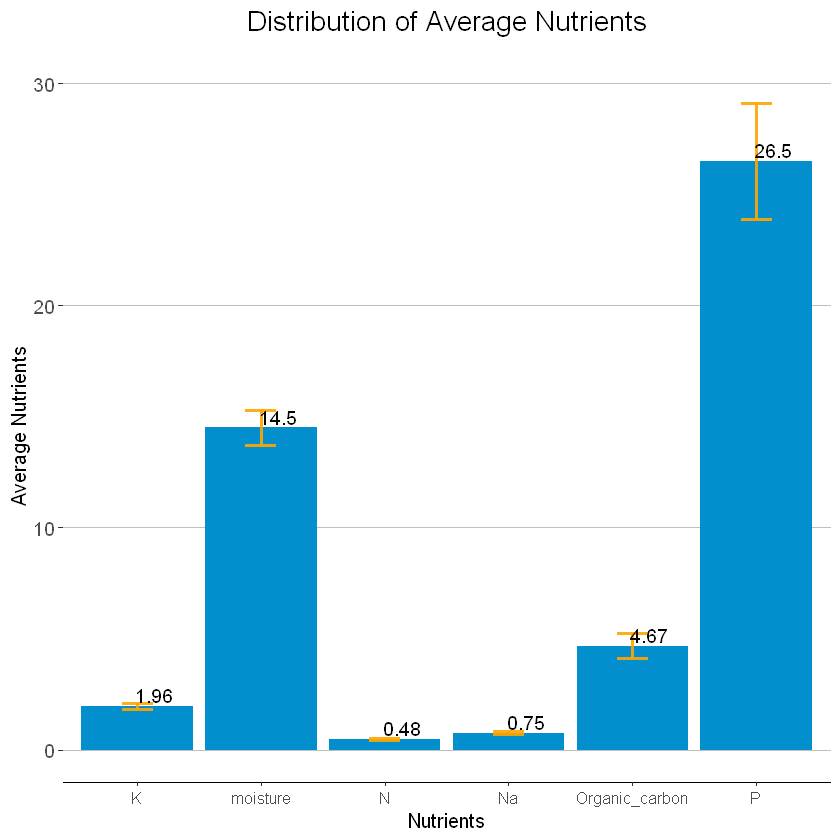

In [10]:
#nutrients only
mydata<-reshaped_df %>%
 group_by(Nutrient) %>%
 summarise(mean.val =round(mean(Values,na.rm=TRUE),2),
          sd = sd(Values,na.rm = TRUE),
          Count = n()) %>%
mutate(se = sd / sqrt(Count),
      lower.ci = mean.val - qt(1 - (0.05 / 2), Count - 1) * se,
       upper.ci = mean.val + qt(1 - (0.05 / 2), Count - 1) * se)
      ggplot(mydata, aes(x=Nutrient,y=mean.val)) +
  geom_bar(stat="identity", fill = "#038ecd") +
  geom_errorbar(aes(x=Nutrient, ymin=lower.ci, ymax=upper.ci), colour="orange", alpha=0.9,width = 0.25, size=1.0) +
  geom_text(aes_string(label = "mean.val"),vjust = -0.25,hjust =0.05, size = 4,position = position_dodge(0.5)) +
  labs(x = "Nutrients", y= "Average Nutrients",title = "Distribution of Average Nutrients", subtitle = "") +
  theme(legend.position = "none",plot.subtitle=element_text(size=rel(1.0), hjust=0.5, face="italic", color="black")) +
  pal + theme_hc()

rm(pattern = "mydata") 

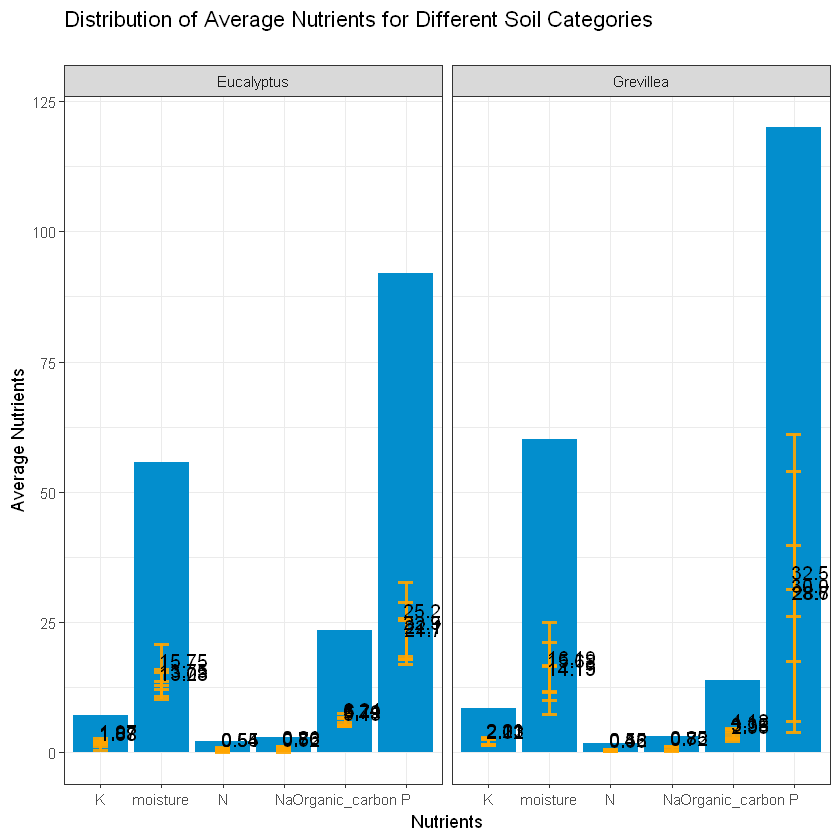

In [11]:
#Soil Category and Nutrients

mydata2<- reshaped_df %>%
  group_by(soil_category, Nutrient,plantation) %>%
  summarise(mean.val = round(mean(Values, na.rm = TRUE),2),
            sd = sd(Values, na.rm = TRUE),
            Count = n()) %>%
  ungroup()%>%
  mutate(se = sd / sqrt(Count),
         lower.ci = mean.val - qt(1 - (0.05 / 2), Count - 1) * se,
         upper.ci = mean.val + qt(1 - (0.05 / 2), Count - 1) * se)

ggplot(mydata2, aes(x=Nutrient,y=mean.val)) +
  geom_bar(stat="identity", fill = "#038ecd") +
  geom_errorbar(aes(x=Nutrient, ymin=lower.ci, ymax=upper.ci), colour="orange", alpha=0.9,width = 0.25, size=1.0) +
  geom_text(aes_string(label = "mean.val"),vjust = -0.25,hjust =0.05, size = 4,position = position_dodge(0.5)) +
  labs(x = "Nutrients", y= "Average Nutrients",title = "Distribution of Average Nutrients for Different Soil Categories", subtitle = "") +
  theme(legend.position = "none",plot.subtitle=element_text(size=rel(1.0), hjust=0.5, face="italic", color="black")) +
  pal + theme_hc() + facet_wrap(~plantation) + theme_bw()


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font fa

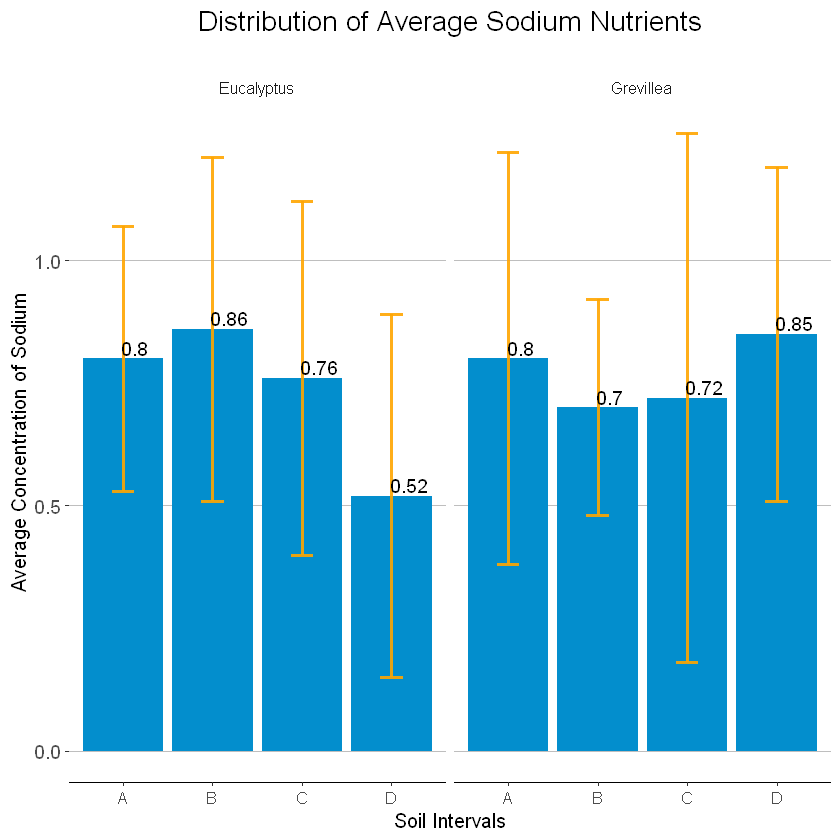

In [13]:
#1.) Sodium
Sodium<- dataset %>%
  group_by(soil_category,plantation) %>% # groups data with respect to soil category and plantation
  summarise(mean.val = round(mean(Na, na.rm = TRUE),2), #function to calculate sd and mean
            sd = sd(Na, na.rm = TRUE),
            Count = n()) %>%
  mutate(se = sd / sqrt(Count),
         lower.ci = round(mean.val - qt(1 - (0.05 / 2), Count - 1) * se,2),
         upper.ci = round(mean.val + qt(1 - (0.05 / 2), Count - 1) * se,2))

ggplot(Sodium, aes(x=soil_category,y=mean.val)) +
  geom_bar(stat="identity", fill = "#038ecd") +
  geom_errorbar(aes(x=soil_category, ymin=lower.ci, ymax=upper.ci), colour="orange", alpha=0.9,width = 0.25, size=1.0) +
  geom_text(aes_string(label = "mean.val"),vjust = -0.25,hjust =0.05, size = 4,position = position_dodge(0.5)) +
  labs(x = "Soil Intervals", y= "Average Concentration of Sodium",title = "Distribution of Average Sodium Nutrients", subtitle = "") +
  theme(legend.position = "none",plot.subtitle=element_text(size=rel(1.0), hjust=0.5, face="italic", color="black")) +
  pal + theme_hc() + facet_wrap(~plantation) # facet_warp;grouping the plot based on plantation


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font fa

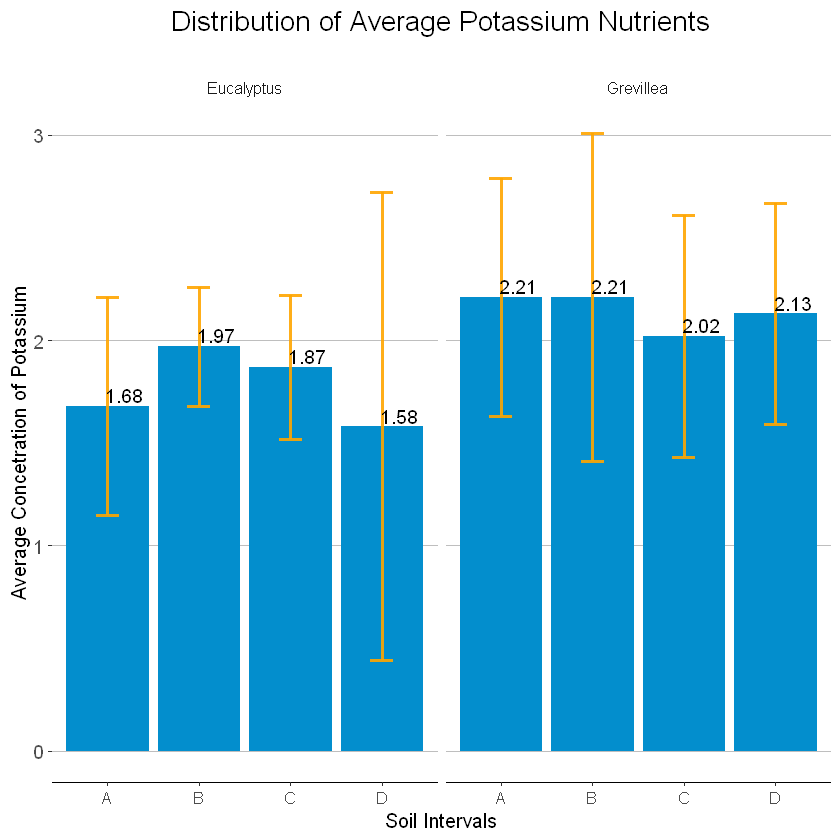

In [18]:
#.2) Potassium
Potassium<- dataset %>%
  group_by(soil_category,plantation) %>% # groups data with respect to soil category and plantation
  summarise(mean.val = round(mean(K, na.rm = TRUE),2), #function to calculate sd and mean 
            sd = sd(K, na.rm = TRUE),
            Count = n()) %>%
  mutate(se = sd / sqrt(Count),
         lower.ci = round(mean.val - qt(1 - (0.05 / 2), Count - 1) * se,2),
         upper.ci = round(mean.val + qt(1 - (0.05 / 2), Count - 1) * se,2))

ggplot(Potassium, aes(x=soil_category,y=mean.val)) +
  geom_bar(stat="identity", fill = "#038ecd") +
  geom_errorbar(aes(x=soil_category, ymin=lower.ci, ymax=upper.ci), colour="orange", alpha=0.9,width = 0.25, size=1.0) +
  geom_text(aes_string(label = "mean.val"),vjust = -0.25,hjust =0.05, size = 4,position = position_dodge(0.5)) +
  labs(x = "Soil Intervals", y= "Average Concetration of Potassium",title = "Distribution of Average Potassium Nutrients", subtitle = "") +
  theme(legend.position = "none",plot.subtitle=element_text(size=rel(1.0), hjust=0.5, face="italic", color="black")) +
  pal + theme_hc() + facet_wrap(~plantation)


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font fa

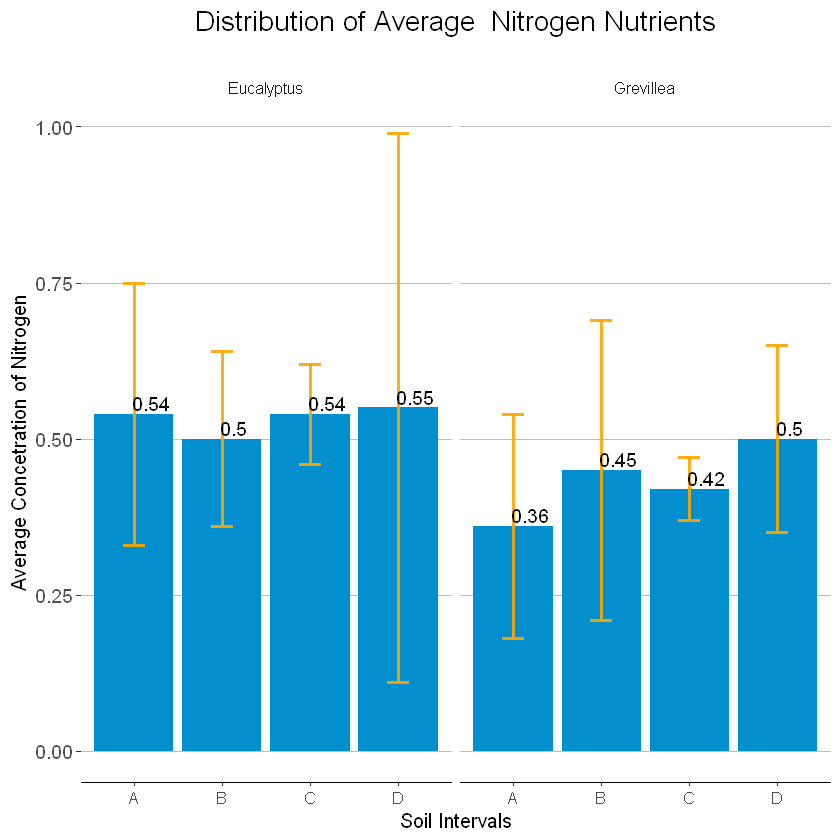

In [19]:
#3) Nitrogen
Nitrogen<- dataset %>%
  #mutate(soil_category= factor(paste("Location",soil_category,sep = " ")))%>%
  group_by(soil_category,plantation) %>% # groups data with respect to soil category and plantation
  summarise(mean.val = round(mean(N, na.rm = TRUE),2), #function to calculate sd and mean 
            sd = sd(N, na.rm = TRUE),
            Count = n()) %>%
  mutate(se = sd / sqrt(Count),
         lower.ci = round(mean.val - qt(1 - (0.05 / 2), Count - 1) * se,2),
         upper.ci = round(mean.val + qt(1 - (0.05 / 2), Count - 1) * se,2))

ggplot(Nitrogen, aes(x=soil_category,y=mean.val)) +
  geom_bar(stat="identity", fill = "#038ecd") +
  geom_errorbar(aes(x=soil_category, ymin=lower.ci, ymax=upper.ci), colour="orange", alpha=0.9,width = 0.25, size=1.0) +
  geom_text(aes_string(label = "mean.val"),vjust = -0.25,hjust =0.05, size = 4,position = position_dodge(0.5)) +
  labs(x = "Soil Intervals", y= "Average Concetration of Nitrogen",title = "Distribution of Average  Nitrogen Nutrients", subtitle = "") +
  theme(legend.position = "none",plot.subtitle=element_text(size=rel(1.0), hjust=0.5, face="italic", color="black")) +
  pal + theme_hc() + facet_wrap(~plantation)



Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font fa

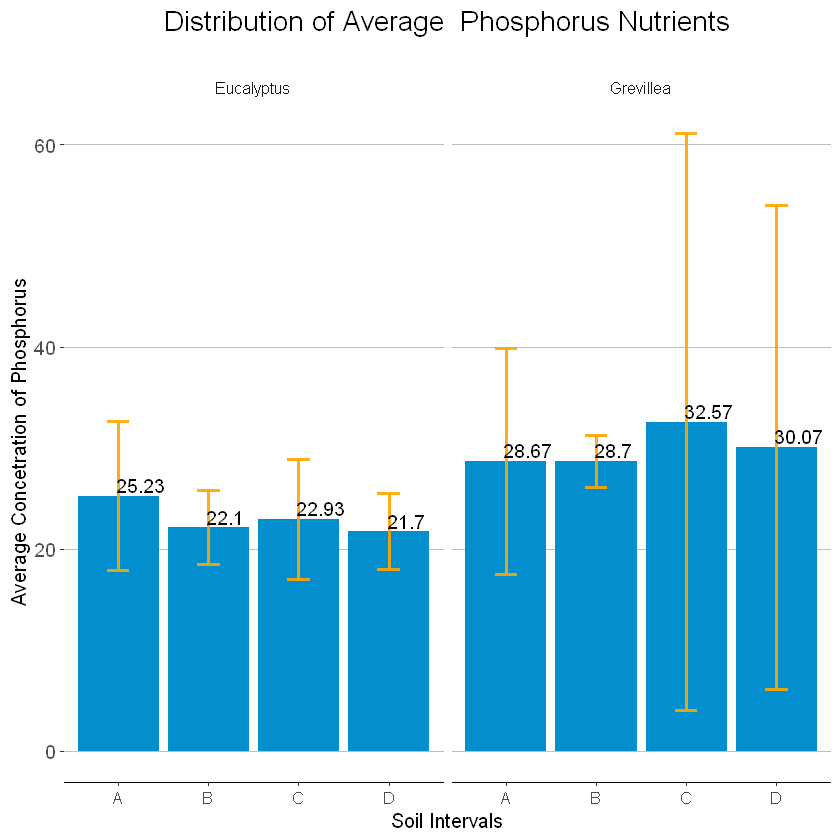

In [17]:
#4) Phosphorus

Phosphorus<- dataset %>%
  group_by(soil_category,plantation) %>% # groups data with respect to soil category and plantation
  summarise(mean.val = round(mean(P, na.rm = TRUE),2), #function to calculate sd and mean 
            sd = sd(P, na.rm = TRUE),
            Count = n()) %>%
  mutate(se = sd / sqrt(Count),
         lower.ci = round(mean.val - qt(1 - (0.05 / 2), Count - 1) * se,2),
         upper.ci = round(mean.val + qt(1 - (0.05 / 2), Count - 1) * se,2))

ggplot(Phosphorus, aes(x=soil_category,y=mean.val)) +
  geom_bar(stat="identity", fill = "#038ecd") +
  geom_errorbar(aes(x=soil_category, ymin=lower.ci, ymax=upper.ci), colour="orange", alpha=0.9,width = 0.25, size=1.0) +
  geom_text(aes_string(label = "mean.val"),vjust = -0.25,hjust =0.05, size = 4,position = position_dodge(0.5)) +
  labs(x = "Soil Intervals", y= "Average Concetration of Phosphorus",title = "Distribution of Average  Phosphorus Nutrients", subtitle = "") +
  theme(legend.position = "none",plot.subtitle=element_text(size=rel(1.0), hjust=0.5, face="italic", color="black")) +
  pal + theme_hc() + facet_wrap(~plantation)

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font fa

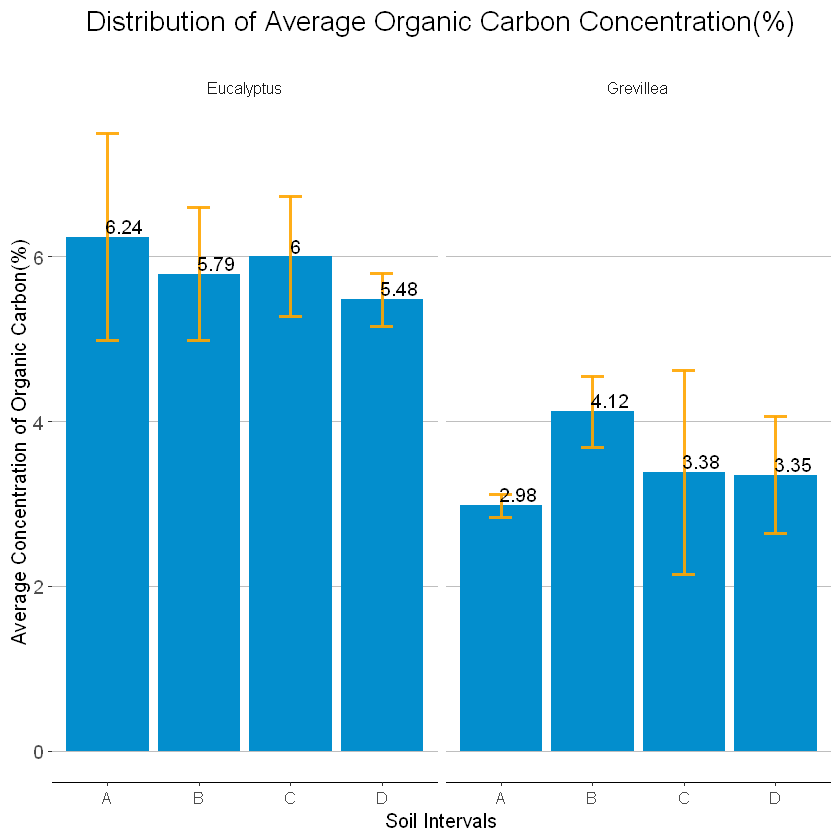

In [20]:
#.5) organic_carbon
organic_carbon<- dataset %>%
  group_by(soil_category,plantation) %>% # groups data with respect to soil category and plantation
  summarise(mean.val = round(mean(Organic_carbon, na.rm = TRUE),2), #function to calculate sd and mean 
            sd = sd(Organic_carbon, na.rm = TRUE),
            Count = n()) %>%
  mutate(se = sd / sqrt(Count),
         lower.ci = round(mean.val - qt(1 - (0.05 / 2), Count - 1) * se,2),
         upper.ci = round(mean.val + qt(1 - (0.05 / 2), Count - 1) * se,2))

ggplot(organic_carbon, aes(x=soil_category,y=mean.val)) +
  geom_bar(stat="identity", fill = "#038ecd") +
  geom_errorbar(aes(x=soil_category, ymin=lower.ci, ymax=upper.ci), colour="orange", alpha=0.9,width = 0.25, size=1.0) +
  geom_text(aes_string(label = "mean.val"),vjust = -0.25,hjust =0.05, size = 4,position = position_dodge(0.5)) +
  labs(x = "Soil Intervals", y= "Average Concentration of Organic Carbon(%)",title = "Distribution of Average Organic Carbon Concentration(%)", subtitle = "") +
  theme(legend.position = "none",plot.subtitle=element_text(size=rel(1.0), hjust=0.5, face="italic", color="black")) +
  pal + theme_hc() + facet_wrap(~plantation)



In [ ]:
#.6) Moisture_Content
Moisture_Content<- dataset %>%
  group_by(soil_category,plantation) %>% # groups data with respect to soil category and plantation
  summarise(mean.val = round(mean(moisture, na.rm = TRUE),2), #function to calculate sd and mean 
            sd = sd(moisture, na.rm = TRUE),
            Count = n()) %>%
  mutate(se = sd / sqrt(Count),
         lower.ci = round(mean.val - qt(1 - (0.05 / 2), Count - 1) * se,2),
         upper.ci = round(mean.val + qt(1 - (0.05 / 2), Count - 1) * se,2))

ggplot(Moisture_Content, aes(x=soil_category,y=mean.val)) +
  geom_bar(stat="identity", fill = "#038ecd") +
  geom_errorbar(aes(x=soil_category, ymin=lower.ci, ymax=upper.ci), colour="orange", alpha=0.9,width = 0.25, size=1.0) +
  geom_text(aes_string(label = "mean.val"),vjust = -0.25,hjust =0.05, size = 4,position = position_dodge(0.5)) +
  labs(x = "Soil Intervals", y= "Average Moisture Concentration(%)",title = "Distribution of Average Moisture Concentration(%)", subtitle = "") +
  theme(legend.position = "none",plot.subtitle=element_text(size=rel(1.0), hjust=0.5, face="italic", color="black")) +
  pal + theme_hc() + facet_wrap(~plantation)